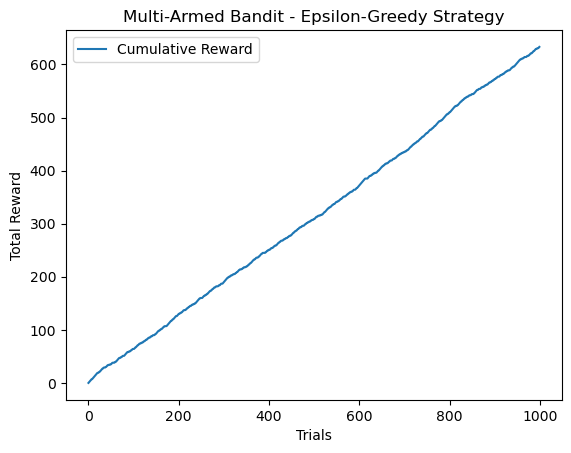

In [37]:
import numpy as np
import matplotlib.pyplot as plt


num_arms = 5
true_reward = np.random.rand(num_arms)

epsilon = 0.3
num_trials = 1000
Q_values = np.zeros(num_arms)
counts = np.zeros(num_arms)
E_algo = np.zeros(2)
total_rewards = []

for trial in range(num_trials):
    # Exploration
    if np.random.rand() < epsilon:
        action = np.random.randint(num_arms)
        E_algo[0] += 1
    else:
        # Exploitation
        action = np.argmax(Q_values)
        E_algo[1] += 1
    reward = np.random.rand() < true_reward[action]
    counts[action] += 1
    Q_values[action] += (reward - Q_values[action]) / counts[action]
    total_rewards.append(reward)
plt.plot(np.cumsum(total_rewards), label="Cumulative Reward")
plt.xlabel("Trials")
plt.ylabel("Total Reward")
plt.title("Multi-Armed Bandit - Epsilon-Greedy Strategy")
plt.legend()
plt.show()

In [38]:
print(counts)

[ 64.  65.  54.  55. 762.]


In [39]:
print(Q_values)

[0.46875    0.21538462 0.46296296 0.49090909 0.70472441]


In [40]:
E_algo / 100

array([2.97, 7.03])

In [43]:
from transformers import pipeline

In [45]:
messages = [
    {"role": "user", "content": "Who are you?"},
]
pipe = pipeline("text-generation", model="deepseek-ai/DeepSeek-R1", trust_remote_code=True)
pipe(messages)

ValueError: Could not load model deepseek-ai/DeepSeek-R1 with any of the following classes: (<class 'transformers.models.auto.modeling_auto.AutoModelForCausalLM'>,). See the original errors:

while loading with AutoModelForCausalLM, an error is thrown:
Traceback (most recent call last):
  File "/opt/anaconda3/envs/reinforcement-learning/lib/python3.13/site-packages/transformers/pipelines/base.py", line 289, in infer_framework_load_model
    model = model_class.from_pretrained(model, **kwargs)
  File "/opt/anaconda3/envs/reinforcement-learning/lib/python3.13/site-packages/transformers/models/auto/auto_factory.py", line 559, in from_pretrained
    return model_class.from_pretrained(
           ~~~~~~~~~~~~~~~~~~~~~~~~~~~^
        pretrained_model_name_or_path, *model_args, config=config, **hub_kwargs, **kwargs
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    )
    ^
  File "/opt/anaconda3/envs/reinforcement-learning/lib/python3.13/site-packages/transformers/modeling_utils.py", line 3605, in from_pretrained
    config.quantization_config = AutoHfQuantizer.merge_quantization_configs(
                                 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~^
        config.quantization_config, quantization_config
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    )
    ^
  File "/opt/anaconda3/envs/reinforcement-learning/lib/python3.13/site-packages/transformers/quantizers/auto.py", line 181, in merge_quantization_configs
    quantization_config = AutoQuantizationConfig.from_dict(quantization_config)
  File "/opt/anaconda3/envs/reinforcement-learning/lib/python3.13/site-packages/transformers/quantizers/auto.py", line 105, in from_dict
    raise ValueError(
    ...<2 lines>...
    )
ValueError: Unknown quantization type, got fp8 - supported types are: ['awq', 'bitsandbytes_4bit', 'bitsandbytes_8bit', 'gptq', 'aqlm', 'quanto', 'eetq', 'higgs', 'hqq', 'compressed-tensors', 'fbgemm_fp8', 'torchao', 'bitnet', 'vptq']




In [50]:
from huggingface_hub import InferenceClient
import os
from dotenv import load_dotenv

load_dotenv()
hg_key = os.getenv("HUGGING_FACE_API")

client = InferenceClient(
	provider="together",
	api_key=hg_key,
)

messages = [
	{
		"role": "user",
		"content": "What is the capital of Tanzania?"
	}
]

completion = client.chat.completions.create(
    model="deepseek-ai/DeepSeek-R1",
	messages=messages,
	max_tokens=500
)

print(completion.choices[0].message)

ChatCompletionOutputMessage(role='assistant', content="<think>\nOkay, so I need to figure out the capital of Tanzania. Hmm, I remember that some countries have different capitals for different branches of government. Let me think. Tanzania is in East Africa, right? I think it was formed by the union of Tanganyika and Zanzibar. Maybe one of those places has the capital?\n\nWait, I recall that Dar es Salaam is a major city there. Maybe that's the capital? But I also have a vague memory that there's another city called Dodoma. I think they might have moved the capital from Dar es Salaam to Dodoma at some point. When did that happen? I'm not sure. Maybe Dodoma is the official capital now, but Dar es Salaam is still where a lot of government functions are?\n\nLet me check my facts. From what I remember, in the 1970s, the Tanzanian government decided to move the capital to Dodoma to centralize the country's administration. However, the relocation process has been slow. So, officially, Dodoma